## 📍 Map initialization

There are several ways to draw background maps with Python. For a complete review, visit the [map section](https://python-graph-gallery.com/map) of the gallery

This example uses the `Basemap` library. Let's initialize a map of the world as explained in [this post](https://python-graph-gallery.com/281-basic-map-with-basemap).

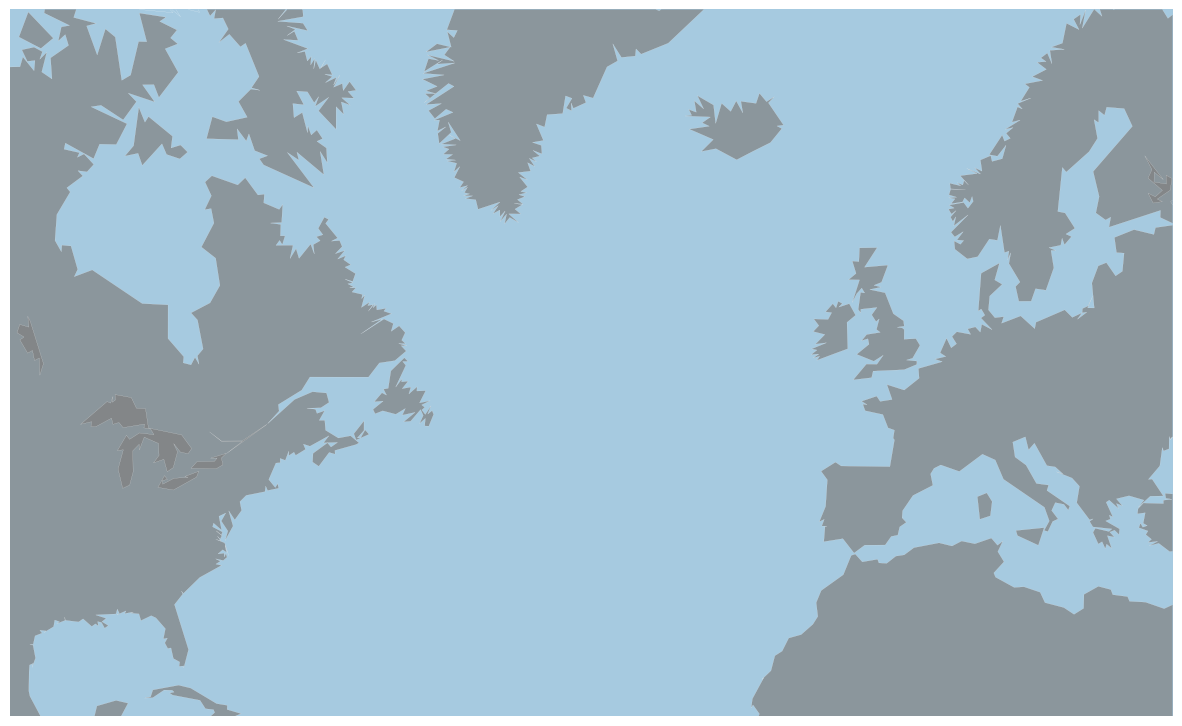

In [14]:
# libraries
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

# Set the plot size for this notebook:
plt.rcParams["figure.figsize"]=15,12

# A basic map
m = Basemap(llcrnrlon=-100,
            llcrnrlat=20,
            urcrnrlon=30,
            urcrnrlat=70,
            projection='merc')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")

## 🔗  Great Circle

> A great circle is the intersection of the sphere and a plane that passes through the center point of the sphere. [Wikipedia](https://en.wikipedia.org/wiki/Great_circle)

Basically, a great circle shows the shortest path between 2 locations, knowing that our planet is a sphere. This path is not a straight line but an arc, which gives a much better appearance to the map.

Let's add a connection between London and New York. This is quite straightforward with `Basemap` thanks to the `drawgreatcircle()` function.

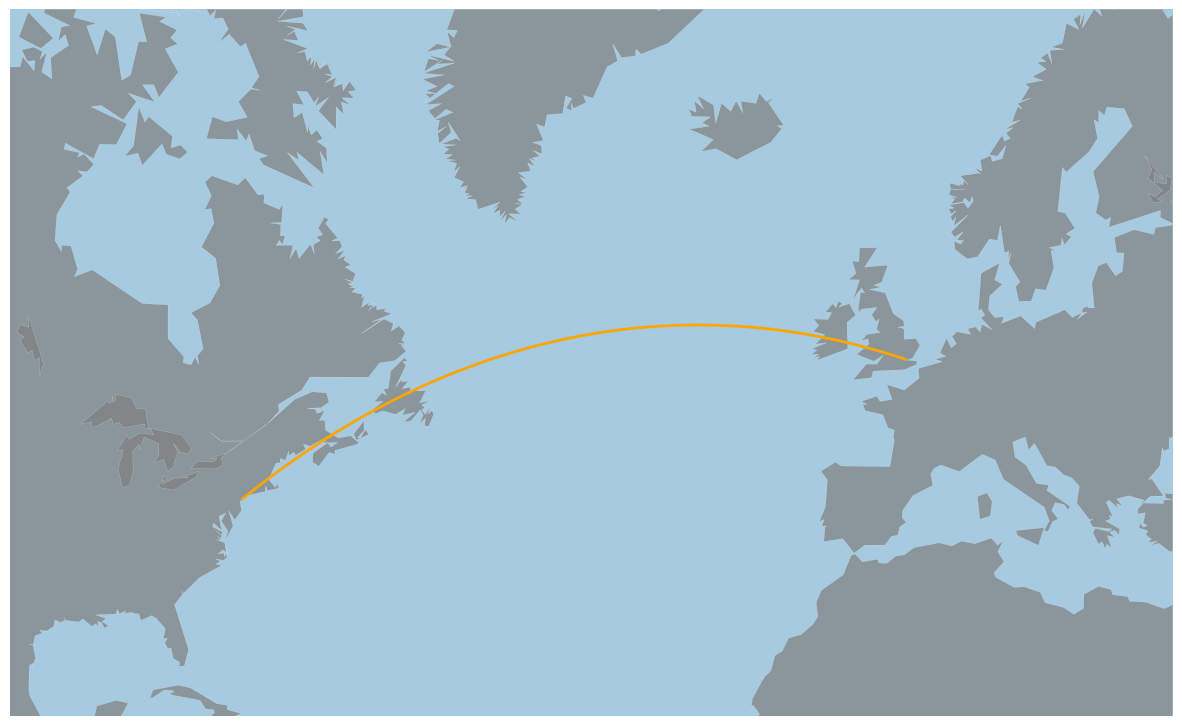

In [15]:
# Background map
m = Basemap(llcrnrlon=-100,
            llcrnrlat=20,
            urcrnrlon=30,
            urcrnrlat=70,
            projection='merc')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")

# Add a connection between new york and London
startlat = 40.78; startlon = -73.98
arrlat = 51.53; arrlon = 0.08
m.drawgreatcircle(startlon, startlat, arrlon, arrlat, linewidth=2, color='orange')

## 🌐 From dataframe

Let's consider a `Pandas` data frame that lists a few major cities of the world. For each city, latitude and longitude are available:

In [16]:
# Dataframe: list of a few cities with their coordinates:
import pandas as pd
import pandas as pd
cities = {
    'city': ["Paris", "Melbourne", "Saint.Petersburg",
            "Abidjan", "Montreal", "Nairobi", "Salvador"],
    'lon': [2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
    'lat': [49, -38, 59.93, 5.33, 45.52, -1.29, -12.97]
    }
df = pd.DataFrame(cities, columns = ['city', 'lon', 'lat'])

Let's loop through this dataframe and add a connection between each pair of city. Moreover, let's use the `annotate()` function of `matplotlib` to add the city names on the map.

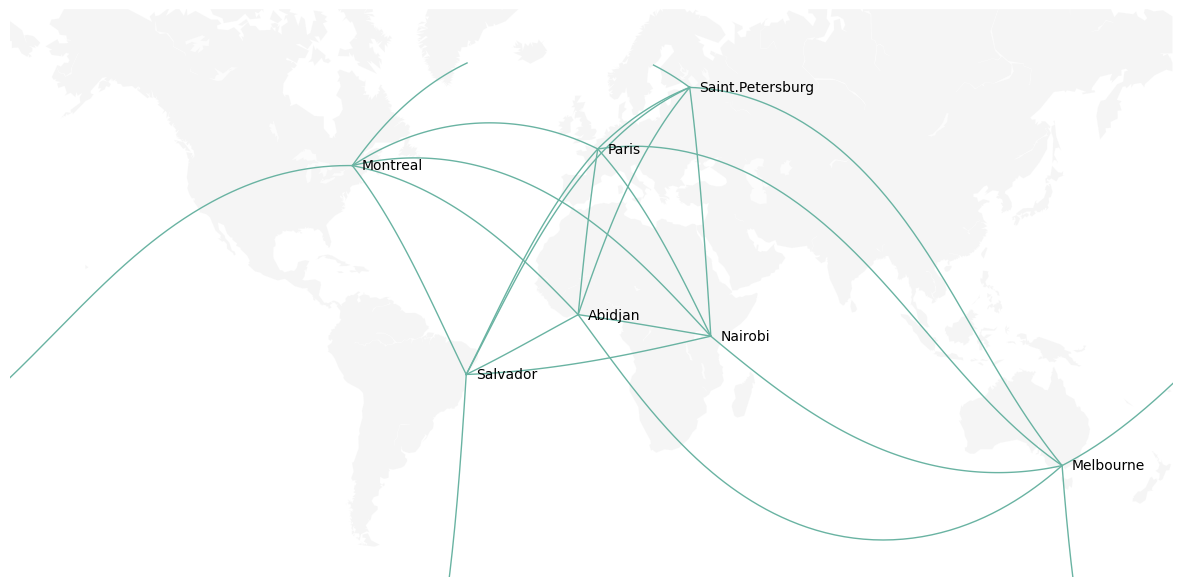

In [17]:
# Background map
m = Basemap(llcrnrlon=-179,
            llcrnrlat=-60,
            urcrnrlon=179,
            urcrnrlat=70, 
            projection='merc')
m.drawmapboundary(fill_color='white', linewidth=0)
m.fillcontinents(color='#f2f2f2', alpha=0.7)
m.drawcoastlines(linewidth=0.1, color="white")

# Loop on every pair of cities to add the connection
for startIndex, startRow in df.iterrows():
    for endIndex in range(startIndex, len(df.index)):
        endRow = df.iloc[endIndex]

        # if the same city, skip to avoid a GeodError
        if startRow.city == endRow.city:
            pass
        else:
            m.drawgreatcircle(startRow.lon, startRow.lat, endRow.lon, endRow.lat,
                              linewidth=1, color='#69b3a2')

# Add city names
for i, row in df.iterrows():
    plt.annotate(row.city, xy=m(row.lon+3, row.lat), verticalalignment='center')